## 1. Data Loading

In [1]:
!pip install cufflinks

In [2]:
from CryptoCompareAPI import CryptoCompareAPI
from utils import COIN_LIST, myconcat
import cufflinks as cf
import pandas as pd
from datetime import timedelta

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# Get trading data from CryptoCompareAPI
api = CryptoCompareAPI()

param_list = []
for coin in COIN_LIST:
    param_list.append(
        {'fsym':coin, 'tsym':'USD', 'limit':60*24}
    )

df_list = []
for param in param_list:
    df = api.getCandle('m', param)
    df_list.append(df)

df = myconcat(df_list, ['time', 'close'])
df.columns = ['time'] + COIN_LIST
df.time = pd.to_datetime(df.time, unit='s')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 8 columns):
time    1441 non-null datetime64[ns]
USDT    1441 non-null float64
DAI     1441 non-null float64
TUSD    1441 non-null float64
GUSD    1441 non-null float64
USDC    1441 non-null float64
PAX     1441 non-null float64
USDS    1441 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 90.1 KB


In [5]:
df.set_index('time', inplace=True)

In [6]:
df.head()

,USDT,DAI,TUSD,GUSD,USDC,PAX,USDS
time,,,,,,,
2019-07-03 22:25:00,1.002,0.9921,0.999,0.9874,0.999,0.998,1.006
2019-07-03 22:26:00,1.002,0.9921,0.999,0.9914,0.999,0.998,1.007
2019-07-03 22:27:00,1.003,0.9921,0.998,0.9938,0.999,0.995,1.001
2019-07-03 22:28:00,1.003,0.9921,0.997,1.0010,0.998,0.995,1.012
2019-07-03 22:29:00,1.003,0.9881,0.995,0.9947,0.998,0.996,1.005


## 2. Intraday vol calulation

### 2.1 Standard Deviation

In [7]:
df_vol1 = pd.DataFrame()

In [8]:
for coin in COIN_LIST:
    col_name = coin + '_vol'
    crt_time = df.index[0]
    for time in df.index[60:]:
        ind_start = time - timedelta(hours=1)
        ind_end = time
        df_vol1.loc[ind_end, col_name] = df[coin][ind_start:ind_end].std()*100

In [9]:
df_vol1.head()

,USDT_vol,DAI_vol,TUSD_vol,GUSD_vol,USDC_vol,PAX_vol,USDS_vol
2019-07-03 23:05:00,0.041906,0.127100,0.099450,0.347627,0.079250,0.063342,0.430601
2019-07-03 23:06:00,0.041530,0.127341,0.098301,0.351315,0.080251,0.062701,0.440291
2019-07-03 23:07:00,0.041163,0.127490,0.097192,0.353540,0.081105,0.062079,0.445508
2019-07-03 23:08:00,0.040803,0.127557,0.096119,0.353366,0.081833,0.061474,0.448477
2019-07-03 23:09:00,0.040452,0.127554,0.095081,0.354183,0.082450,0.060886,0.450943


<Figure size 7200x25200 with 0 Axes>

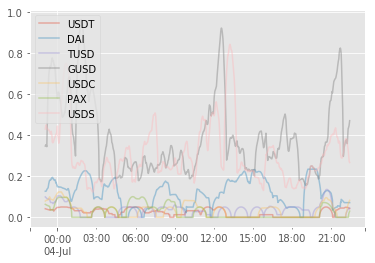

In [10]:
plt.figure(figsize=(100,50))
df_vol1.plot(alpha=0.4, style='-')
plt.legend(COIN_LIST, loc='upper left')

### 2.2 'Max - Min' Pair

In [11]:
df_vol2 = pd.DataFrame()

In [12]:
for coin in COIN_LIST:
    col_name = coin + '_vol'
    crt_time = df.index[0]
    for time in df.index[40:]:
        ind_start = time - timedelta(hours=1)
        ind_end = time
        df_vol2.loc[ind_end, col_name] = df[coin][ind_start:ind_end].max()-df[coin][ind_start:ind_end].min()

<Figure size 7200x3600 with 0 Axes>

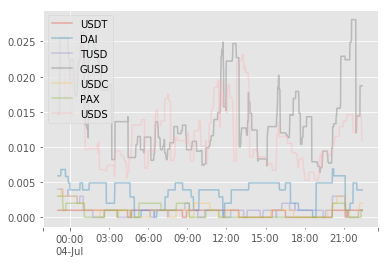

In [13]:
plt.figure(figsize=(100,50))
df_vol2.plot(alpha=0.4, style='-')
plt.legend(COIN_LIST, loc='upper left')

### 2.3 GARCH Model and vol clustering

In [26]:
!pip install arch --no-binary arch

In [28]:
from arch import arch_model
#garch1 = arch_model(df['DAI'].values, vol='Garch', p=1, o=0, q=1, dist='Normal')
#res = garch1.fit(update_freq=60)

AttributeError: type object 'arch.univariate.recursions.array' has no attribute '__reduce_cython__'

In [ ]:
cf.set_config_file(offline=False, world_readable=True, theme='henanigans')
df_vol.iplot(x='time', kind='scatter', xTitle='Date', yTitle='Price', title='Liquidity Profile of Stablecoins')